# Analysis and Visualization of Complex Agro-Environmental Data
---
## Hypothesis testing

Most hypothesis testing functions in Python are provided by the stats submodule of SciPy. Other modules such as statsmodels and scikit have some advantages on the provided outputs and have additional relevant functions for hypothesis testing.

##### Import modules:

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt


##### Simulate populations (N = 100000)

In [6]:
# seed the random number generator
np.random.seed(24)
# generate univariate observations
pop1 = np.random.normal(50,20,100000)
pop2 = np.random.normal(70,25,100000)
pop3 = np.random.exponential(50, 100000)
pop4 = np.random.exponential(100, 100000)

### Parametric one-sample tests
#### One-sample t-test

1. Define H0 : The population mean is 40

2. Take a sample from population (pop1)

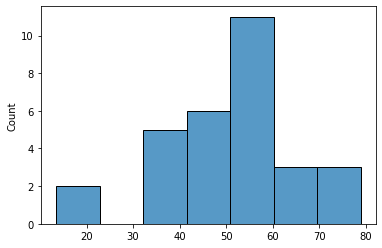

In [7]:
# Take random samples from data (n=30)
import random
sample1 = random.sample(list(pop1), 30)
sns.histplot(sample1)
plt.show()

3. Compute the statistic and check *p-value*

In [10]:
# perform one sample t-test. 
# H0: The population mean is 40
stat, p = sts.ttest_1samp(a=sample1, popmean=40)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))

t-stat=4.266, p-value=0.000


### Parametric two-sample tests
#### Two-sample *t* test (two-tailed)

1. Define H0 : The samples are drawn from populations with equal means

2. Take sample from populations (pop1 and pop2)

In [11]:
# Take random samples from data (n=20)
import random
np.random.seed(24)
sample1 = random.sample(list(pop1), 30)
sample2 = random.sample(list(pop2), 30)
plt.show()

3. Check assumptions: outliers, overal normality, homogeneity of variances

/Users/tristanbertrand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tristanbertrand/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


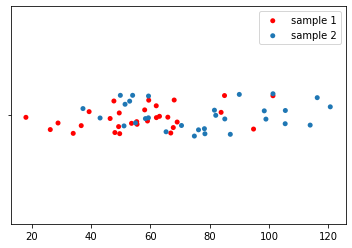

In [14]:
# outliers
sns.stripplot(sample1, label="sample 1", color='red')
sns.stripplot(sample2, label="sample 2")
plt.legend()
plt.show()

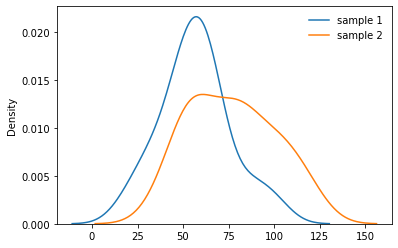

In [15]:
# normality
sns.kdeplot(sample1, label="sample 1")
sns.kdeplot(sample2, label="sample 2")
plt.legend(frameon=False)
plt.show()

In [16]:
# Homogeneity of variances
# Leven's test - tests the null hypothesis that the population variances are equal
stat, p = sts.levene(sample1, sample2, center='median')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=2.641, p=0.110
fail to reject H0. Rejecting H0 has an error probability >0.05


4. Compute the t-statistic and check *p-value*

In [17]:
# t-test - tests the null hypothesis that sample 1 and 2 are derived from populations with the same mean
stat, p = sts.ttest_ind(sample1, sample2, )
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=-3.612, p=0.001
reject H0 with an error probability <0.05)


#### Two-sample *t* test (one-tailed)

H0 : Population 1 has a mean > or = to Population 2

In [18]:
stat, p = sts.ttest_ind(sample1, sample2, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

##### `Now try to run the last two tests analysis with the same code but now using  big data (the whole population or a big sample)`

#### Paired two-sample *t* test (two-tailed)

H0 : The samples are drawn from populations with equal means

In [24]:
stat, p = sts.ttest_rel(pop1, pop2)
print('t-stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

t-stat=-196.356, p-value=0.000
reject H0 with an error probability <0.05)


### Non-parametric two-sample tests
#### Kolmogorov-smirnov test

1. Define H0 : The two samples are drawn from populations with equal distributions
2. Take sample from populations pop1 and pop2 - use the same as previous example
3. Check assumptions (see test for homeogeneity of variances above)
3. Compute the statistic and check *p-value*

In [20]:
stat, p = sts.ks_2samp(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=0.467, p-value=0.003
reject H0 with an error probability <0.05)


#### Mann-Whitney U Test (or Wilcoxon rank sum test) - two-tailed test

H0 : The two samples are drawn from populations with equal medians

In [21]:
stat, p = sts.mannwhitneyu(sample1, sample2, alternative='two-sided')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=240.000, p-value=0.002
reject H0 with an error probability <0.05)


#### Mann-Whitney U Test (or Wilcoxon rank sum test) - one-tailed test

H0 : Population 1 has a median > or = to Population 2

In [25]:
stat, p = sts.mannwhitneyu(sample1, sample2, alternative='greater')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=240.000, p-value=0.999
fail to reject H0. Rejecting H0 has an error probability >0.05


#### Wilcoxon signed rank test (paired)

H0 : The two samples are drawn from populations with equal medians

In [26]:
stat, p = sts.wilcoxon(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=77.000, p-value=0.001
reject H0 with an error probability <0.05)


### Parametric multiple sample tests
#### One-way ANOVA
1. Define H0 : The samples are drawn from populations with equal means
2. Take sample from populations pop1 - pop4

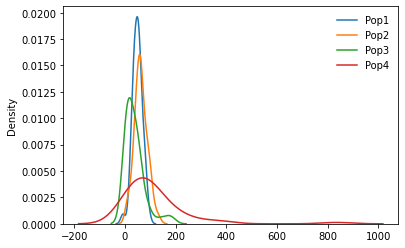

In [27]:
# Take random samples from data (n=20)
import random
sample1 = random.sample(list(pop1), 50)
sample2 = random.sample(list(pop2), 50)
sample3 = random.sample(list(pop3), 50)
sample4 = random.sample(list(pop4), 50)
sns.kdeplot(sample1, label='Pop1')
sns.kdeplot(sample2, label='Pop2')
sns.kdeplot(sample3, label='Pop3')
sns.kdeplot(sample4, label='Pop4')
plt.legend(frameon=False, loc='upper right')
plt.show()

3. Compute the statistic and check the *p-value*

In [28]:
stat, p = sts.f_oneway(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

F-statistics=10.729, p=0.000001
reject H0 with an error probability <0.05)


The SciPy does not provide the usual ANOVA table. An alternative is to use the statsmodel api that includes a more complete output:

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# the statsmodels ANOVA needs to convert data into a DataFrame
list_sample = [sample1, sample2, sample2, sample4]
df = pd.DataFrame(list_sample)
df = df.T
df.columns = ["sample1", "sample2", "sample3", "sample4"]
df = df.stack()
df=df.reset_index()
df.rename(columns = {'level_1':'group', 0:'value'}, inplace = True)
df.drop('level_0', inplace=True, axis=1)
df

,group,value
0,sample1,77.602918
1,sample2,62.336179
2,sample3,62.336179
3,sample4,40.435065
4,sample1,53.425526
...,...,...
195,sample4,124.969196
196,sample1,39.749841
197,sample2,35.374202
198,sample3,35.374202


In [30]:
mod = ols('value ~ group',
                data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2) # typ is the type of anova to perform ('I','II' or 'III' = 1,2,3) - type 2 does not consider interactions, which is the case.
print(aov_table) # provides the usual ANOVA table

                 sum_sq     df         F    PR(>F)
group     120794.149429    3.0  8.217334  0.000035
Residual  960394.788382  196.0       NaN       NaN


#### Two-way ANOVA

Tests whether two factors affect the mean of three or more groups. It also tests whether there is an interaction between the two factors (if one factor changes the effect of the other factor).

Possible H0: 
1. There is no difference in the means of factor A.
2. There is no difference in means of factor B.
3. There is no interaction between factors A and B.

In [31]:
# create data (example taken from https://www.statology.org/two-way-anova-python/) - influence of plant growth by sunlight exposure and watering frequency
df2 = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
print(df2)

     water   sun  height
0    daily   low       6
1    daily   low       6
2    daily   low       6
3    daily   low       5
4    daily   low       6
5    daily   med       5
6    daily   med       5
7    daily   med       6
8    daily   med       4
9    daily   med       5
10   daily  high       6
11   daily  high       6
12   daily  high       7
13   daily  high       8
14   daily  high       7
15  weekly   low       3
16  weekly   low       4
17  weekly   low       4
18  weekly   low       4
19  weekly   low       5
20  weekly   med       4
21  weekly   med       4
22  weekly   med       4
23  weekly   med       4
24  weekly   med       4
25  weekly  high       5
26  weekly  high       6
27  weekly  high       6
28  weekly  high       7
29  weekly  high       8


In [32]:
#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


#### Repeated measures ANOVA

Used when the responses from the same subjects (experimental units) are measured repeatedly over a period of time or under different experimental conditions.

H0: Treatment or time groups means are equal

In [33]:
#create data - Ex: Measurements (time of response to stressor) taken over time for the same fish individuals
df3 = pd.DataFrame({'fish': np.repeat([1, 2, 3, 4, 5], 4),
                   'time': np.tile([1, 2, 3, 4], 5),
                   'time of response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})
df3

,fish,time,time of response
0,1,1,30
1,1,2,28
2,1,3,16
3,1,4,34
4,2,1,14
5,2,2,18
6,2,3,10
7,2,4,22
8,3,1,24
9,3,2,20


In [34]:
rmanova = stm.anova.AnovaRM(data=df3, depvar='time of response', subject='fish', within=['time']).fit()
print(rmanova)

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
time 24.7589 3.0000 12.0000 0.0000



### Post-hoc or multiple comparison tests

#### Tukey's test

To check which pairs of groups differ in their mean values. Can be used also as a stand alone test.
Implemented in statsmodels.stats.multicomp

In [35]:
# perform Tukey's test using the df dataframe defined above)
tukey = stm.multicomp.pairwise_tukeyhsd(endog=df['value'],
                          groups=df['group'],
                          alpha=0.05)
#display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
sample1 sample2  13.2759 0.7534 -23.0029  49.5546  False
sample1 sample3  13.2759 0.7534 -23.0029  49.5546  False
sample1 sample4  64.2086  0.001  27.9299 100.4874   True
sample2 sample3      0.0    0.9 -36.2787  36.2787  False
sample2 sample4  50.9327  0.002   14.654  87.2115   True
sample3 sample4  50.9327  0.002   14.654  87.2115   True
--------------------------------------------------------


### Non-parametric multiple sample tests
#### Kruskal-Wallis test
1. Define H0 : The samples are drawn from populations with equal medians
2. Take sample from populations (pop1 and pop2) - use the same as previous examples
3. Compute the statistic and check the *p-value*

In [36]:
stat, p = sts.kruskal(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

F-statistics=36.465, p=0.000000
reject H0 with an error probability <0.05)


#### Dunn's test (multiple comparisons)

The Dunn's test is a non-parametric multiple comparison test to check which pairs of groups differ when a Kruskal-wallis test (or Friedman test) rejects the null hypothesis. It is implemented in the scikit-posthocs module (you may need to install: run `pip install scikit-posthocs` in the CLI terminal).

H0 : The samples are drawn from populations with equal medians

In [38]:
# need to a list with samples (can be the list_sample produced above)
sp.posthoc_dunn(list_sample, p_adjust = 'bonferroni') # the correction for multiple comparisons is based on the bonferroni's correction.
# the output is a matrix of p-values for each pair of groups.

,1,2,3,4
1,1.000000,0.096562,0.096562,0.000383
2,0.096562,1.000000,1.000000,0.669286
3,0.096562,1.000000,1.000000,0.669286
4,0.000383,0.669286,0.669286,1.000000


#### Friedman test

This is the non-parametric equivalent of a repeated measures ANOVA. It is implemented in statsmodels. 

H0 : The samples are drawn from populations with equal medians

In [39]:
# use same data as for the repeated measures ANOVA
stat, p = sts.friedmanchisquare(df3['time of response'][0:4], 
                                df3['time of response'][5:9], 
                                df3['time of response'][10:14], 
                                df3['time of response'][15:19])
print('Statistic=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistic=3.395, p=0.334673
fail to reject H0. Rejecting H0 has an error probability >0.05


### Tests for categorical variables

#### Chi-Square Test of Independence

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.

H0: The two variables are independent.

In [40]:
# Create data contingency table (counts for each class combination of two categorical variables, for ex. treatment in columns (3 treatments) vs. success of treatment (yes/no) in rows)
data = [[120, 90, 40],
        [110, 95, 45]]

# run test
stat, p, df, expected_freq = sts.chi2_contingency(data)
print('Statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=0.864, p=0.649198
fail to reject H0. Rejecting H0 has an error probability >0.05


ASSIGNEMENT 5

EXERCICE 1

New Mean: 5.800588497673861e-15
New Standard Deviation: 0.9998967102202463
95% Confidence Interval: (-0.028166681906006033, 0.028166681906017635)


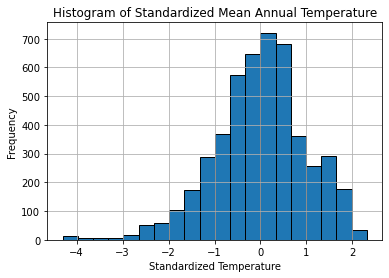

In [56]:
from scipy import stats
from scipy.stats import ttest_ind


df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")


# Drop NaN values from 'Temp_ann' column
df_cleaned = df.dropna(subset=['temp_ann'])

# Calculate the mean and standard deviation
mean_temp_ann = df_cleaned['temp_ann'].mean()
std_temp_ann = df_cleaned['temp_ann'].std()

# Create an empty list to store the standardized values
temp_ann_standardized_list = []

# Standardize using z-score and append each standardized value to the list
for temp_ann in df_cleaned['temp_ann']:
    temp_ann_standardized = (temp_ann - mean_temp_ann) / std_temp_ann
    temp_ann_standardized_list.append(temp_ann_standardized)

# Now temp_ann_standardized_list contains the standardized values without NaN values

# Calculate the new mean and standard deviation
new_mean = np.mean(temp_ann_standardized_list)
new_std = np.std(temp_ann_standardized_list)

# Calculate the 95% confidence interval
ci = stats.norm.interval(0.95, loc=new_mean, scale=new_std / np.sqrt(len(temp_ann_standardized_list)))

# Print the results
print("New Mean:", new_mean)
print("New Standard Deviation:", new_std)
print("95% Confidence Interval:", ci)

# Plot the histogram
plt.hist(temp_ann_standardized_list, bins=20, edgecolor='black')
plt.title('Histogram of Standardized Mean Annual Temperature')
plt.xlabel('Standardized Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

EXERCICE 2

In [76]:
df_cleaned = df.dropna()

# Créer deux listes de valeurs de temp_ann selon les valeurs de Salmo trutta fario
liste_absence = df_cleaned.groupby('Salmo trutta fario')['temp_ann'].apply(list).loc[0]
liste_presence = df_cleaned.groupby('Salmo trutta fario')['temp_ann'].apply(list).loc[1]

presence_normalized = [(temp - np.mean(presence)) / np.std(presence) for temp in presence]
absence_normalized = [(temp - np.mean(absence)) / np.std(absence) for temp in absence]


t_statistic, p_value = ttest_ind(liste_presence, liste_absence)
print("T-Test (Original Values):")
print("H0: means are equal for the 2 populations")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Accept H0: the two means are identical.")
else:
    print("Reject H0: there is a significant difference between the two means.")


t_statistic, p_value = ttest_ind(liste_presence, liste_absence)
print("H0: means are equal for the 2 populations")
print("T-Test (normalized Values):")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Accept H0: the two means are identical.")
else:
    print("Reject H0: there is a significant difference between the two means.")




Liste des températures pour Salmo trutta fario absente: [12.6, 11.1, 12.4, 12.0, 11.9, 16.4, 16.5, 14.6, 12.8, 13.3, 13.9, 13.9, 13.0, 12.6, 13.0, 13.0, 13.4, 13.5, 13.6, 13.4, 12.0, 12.0, 12.1, 12.3, 12.3, 12.3, 12.3, 12.4, 12.4, 12.2, 12.3, 12.3, 13.5, 13.5, 13.6, 13.5, 13.5, 13.7, 13.4, 13.6, 11.8, 12.0, 12.0, 11.3, 12.5, 12.6, 12.7, 14.0, 13.6, 12.4, 11.8, 10.4, 10.5, 12.9, 14.2, 15.5, 13.7, 13.8, 13.3, 13.4, 14.1, 13.8, 11.9, 13.4, 12.1, 12.2, 13.4, 11.9, 13.4, 14.6, 14.7, 14.8, 14.8, 13.4, 14.1, 12.8, 12.9, 13.0, 13.3, 12.2, 12.3, 14.5, 14.1, 14.2, 14.3, 14.1, 14.1, 14.2, 13.5, 13.8, 13.8, 13.8, 14.1, 13.3, 14.2, 13.7, 14.6, 14.3, 13.5, 14.2, 14.6, 14.6, 13.9, 13.5, 14.2, 14.4, 14.2, 14.1, 13.2, 14.2, 14.3, 14.3, 14.5, 14.4, 13.7, 13.7, 13.1, 13.9, 13.6, 13.8, 13.7, 14.4, 13.3, 14.4, 14.9, 13.6, 12.3, 13.4, 12.9, 13.5, 13.3, 14.2, 14.4, 13.8, 14.0, 16.6, 16.4, 15.4, 17.2, 17.3, 12.8, 12.7, 13.3, 13.5, 12.9, 13.5, 13.3, 13.2, 13.7, 13.1, 14.4, 14.4, 14.1, 14.2, 13.8, 14.1, 14.4, 1

EXERCICE 3

In [87]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

top_8_catchments = df['Catchment_name'].value_counts().head(8).index.tolist()
print(top_8_catchments)
elevation_dict = {}

for catchment in top_8_catchments:
    elevation_list = df[df['Catchment_name'] == catchment]['Elevation_mean_catch'].tolist()
    elevation_dict[catchment] = elevation_list

# Extract elevation values for each catchment site
elevation_values = [np.array(elevation_dict[catchment]) for catchment in top_8_catchments]
elevation_values = [values[~np.isnan(values)] for values in elevation_values]


# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*elevation_values)

print("One-Way ANOVA Results:")
print("H0: means are equal")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Post-hoc Tukey's HSD test for pairwise comparisons
print("H0: means are equal")
tukey_results = pairwise_tukeyhsd(np.concatenate(elevation_values), np.concatenate([[i]*len(values) for i, values in enumerate(elevation_values)]))
print("\nTukey's HSD Results:")
print(tukey_results)



print("No significatives difference for Galiza-Norte/Guadia ; Mihno/Douro ; Cantabrica/Catala")


['Ebro', 'Galiza-Norte', 'Minho', 'Tejo', 'Cantabrica', 'Douro', 'Guadia', 'Catala']
One-Way ANOVA Results:
H0: means are equal
F-Statistic: 227.9539828360388
P-Value: 1.369526482034513e-285
H0: means are equal

Tukey's HSD Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1 -651.7093  0.001 -710.5323 -592.8862   True
     0      2 -176.4404  0.001 -235.3052 -117.5756   True
     0      3 -299.1072  0.001  -364.079 -234.1353   True
     0      4 -467.4299  0.001 -535.0623 -399.7974   True
     0      5 -199.2714  0.001 -268.7939  -129.749   True
     0      6 -636.3246  0.001 -712.0552 -560.5939   True
     0      7 -417.2415  0.001 -503.2604 -331.2227   True
     1      2  475.2688  0.001  416.2804  534.2573   True
     1      3  352.6021  0.001  287.5181  417.6861   True
     1      4  184.2794  0.001  116.5392  252.0196   True
     1      5

EXERCICE 4

Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

The main probleme is that the database is big wich lead to a lot of significatives differneces because the standard deviation is realy low. So sometimes significatives differences can be realy small and not realy intereesting.